<a href="https://colab.research.google.com/github/McATung/AI/blob/main/BT1_88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #thư viện xử lý ma trận
from keras.utils import np_utils # thư viện xử lý chuyển class
from keras.datasets import fashion_mnist # gọi tập dataset thời trang
from keras.models import Sequential # hàm chạy mô hình
from keras.layers import Dense, Dropout # tạo mạng nơ ron
from tensorflow.keras.optimizers import RMSprop 
import matplotlib.pyplot as plt  # thư viện dùng để vẽ

In [ ]:
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

In [ ]:
print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)

Kích thước x_train:  (60000, 28, 28)
Kích thước y_train:  (60000,)
Kích thước x_test:  (10000, 28, 28)
Kích thước y_test:  (10000,)


In [ ]:
#chuyển chiều của x từ 3 chiều về 2 chiều
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
# ép kiểu
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#chuẩn hóa dữ liệu
x_train /=255
x_test /=255
#chuyển y từ 1 class thành 10 class
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
#tạo mạng nơ-ron
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#chạy model với số lần học là 500 và độ kiên nhẫn là 75
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,
                    validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=75)])

Epoch 1/500
375/375 [==============================] - 8s 19ms/step - loss: 0.5925 - accuracy: 0.7837 - val_loss: 0.4392 - val_accuracy: 0.8219
Epoch 2/500
375/375 [==============================] - 7s 18ms/step - loss: 0.4162 - accuracy: 0.8478 - val_loss: 0.3969 - val_accuracy: 0.8563
Epoch 3/500
375/375 [==============================] - 7s 18ms/step - loss: 0.3766 - accuracy: 0.8607 - val_loss: 0.3558 - val_accuracy: 0.8708
Epoch 4/500
375/375 [==============================] - 7s 18ms/step - loss: 0.3541 - accuracy: 0.8695 - val_loss: 0.3702 - val_accuracy: 0.8716
Epoch 5/500
375/375 [==============================] - 7s 18ms/step - loss: 0.3392 - accuracy: 0.8767 - val_loss: 0.3688 - val_accuracy: 0.8669
Epoch 6/500
375/375 [==============================] - 7s 18ms/step - loss: 0.3272 - accuracy: 0.8820 - val_loss: 0.3338 - val_accuracy: 0.8832
Epoch 7/500
375/375 [==============================] - 7s 18ms/step - loss: 0.3193 - accuracy: 0.8836 - val_loss: 0.3528 - val_accuracy:

Sai số kiểm tra là:  0.8434401154518127
Độ chính xác kiểm tra là:  0.8878999948501587


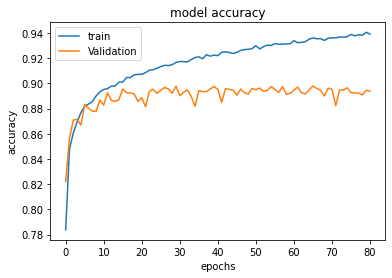

In [ ]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
#vẽ đồ thị
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()